In [1]:
#importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
car_data = pd.read_csv("CarPrice_Assignment.csv")

In [3]:
#checking 5 records in the dataset
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
#info about dataset
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
#checking null values in each attribute
car_data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
car_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
car_data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [8]:
print(car_data['fueltype'].value_counts())
print(car_data['aspiration'].value_counts())
print(car_data['doornumber'].value_counts())
print(car_data['carbody'].value_counts())
print(car_data['drivewheel'].value_counts())
print(car_data['enginelocation'].value_counts())
print(car_data['enginetype'].value_counts())
print(car_data['cylindernumber'].value_counts())
print(car_data['fuelsystem'].value_counts())

gas       185
diesel     20
Name: fueltype, dtype: int64
std      168
turbo     37
Name: aspiration, dtype: int64
four    115
two      90
Name: doornumber, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
front    202
rear       3
Name: enginelocation, dtype: int64
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64


In [9]:
fuel = car_data['fueltype']
aspiration = car_data['aspiration']
doors = car_data['doornumber']
carbody = car_data['carbody']
drivewheel = car_data['drivewheel']
engineloc = car_data['enginelocation']
engtype = car_data['enginetype']
cylinders = car_data['cylindernumber']
fuelsystem = car_data['fuelsystem']
price = car_data['price']

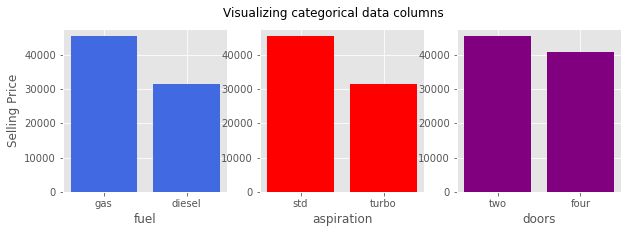

<Figure size 432x288 with 0 Axes>

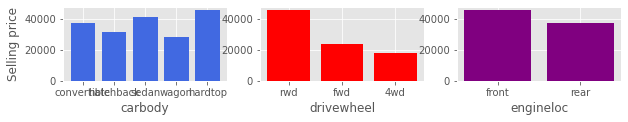

<Figure size 432x288 with 0 Axes>

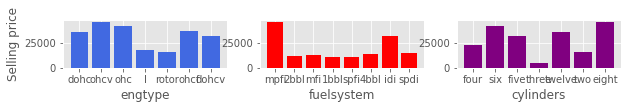

<Figure size 432x288 with 0 Axes>

In [29]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(10,3))
fig.suptitle('Visualizing categorical data columns')
plt.subplot(1,3,1)
plt.bar(fuel,price, color='royalblue')
plt.xlabel("fuel")
plt.ylabel("Selling Price")
plt.subplot(1,3,2)
plt.bar(aspiration, price, color='red')
plt.xlabel("aspiration")
plt.subplot(1,3,3)
plt.bar(doors, price, color='purple')
plt.xlabel('doors')
plt.show()
plt.savefig("categorical1.png")
fig = plt.figure(figsize=(10,3))
plt.subplot(2,3,4)
plt.bar(carbody,price, color='royalblue')
plt.xlabel("carbody")
plt.ylabel("Selling price")
plt.subplot(2,3,5)
plt.bar(drivewheel, price, color='red')
plt.xlabel("drivewheel")
plt.subplot(2,3,6)
plt.bar(engineloc, price, color='purple')
plt.xlabel('engineloc')
plt.show()
plt.savefig("categorical2.png")
fig = plt.figure(figsize=(10,3))
plt.subplot(3,3,7)
plt.bar(engtype,price, color='royalblue')
plt.xlabel("engtype")
plt.ylabel("Selling price")
plt.subplot(3,3,8)
plt.bar(fuelsystem, price, color='red')
plt.xlabel("fuelsystem")
plt.subplot(3,3,9)
plt.bar(cylinders, price, color='purple')
plt.xlabel('cylinders')
plt.show()
plt.savefig("categorical3.png")

In [11]:
#one hot encoding
car_data = pd.get_dummies(car_data, columns=['aspiration', 'carbody'], drop_first=True)
car_data = pd.get_dummies(car_data, columns=['fueltype', 'doornumber'], drop_first=True)
car_data = pd.get_dummies(car_data, columns=['cylindernumber', 'fuelsystem'], drop_first=True)
car_data = pd.get_dummies(car_data, columns=['enginetype', 'drivewheel'], drop_first=True)
car_data = pd.get_dummies(car_data, columns=['enginelocation'], drop_first=True)

In [12]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   car_ID                 205 non-null    int64  
 1   symboling              205 non-null    int64  
 2   CarName                205 non-null    object 
 3   wheelbase              205 non-null    float64
 4   carlength              205 non-null    float64
 5   carwidth               205 non-null    float64
 6   carheight              205 non-null    float64
 7   curbweight             205 non-null    int64  
 8   enginesize             205 non-null    int64  
 9   boreratio              205 non-null    float64
 10  stroke                 205 non-null    float64
 11  compressionratio       205 non-null    float64
 12  horsepower             205 non-null    int64  
 13  peakrpm                205 non-null    int64  
 14  citympg                205 non-null    int64  
 15  highwa

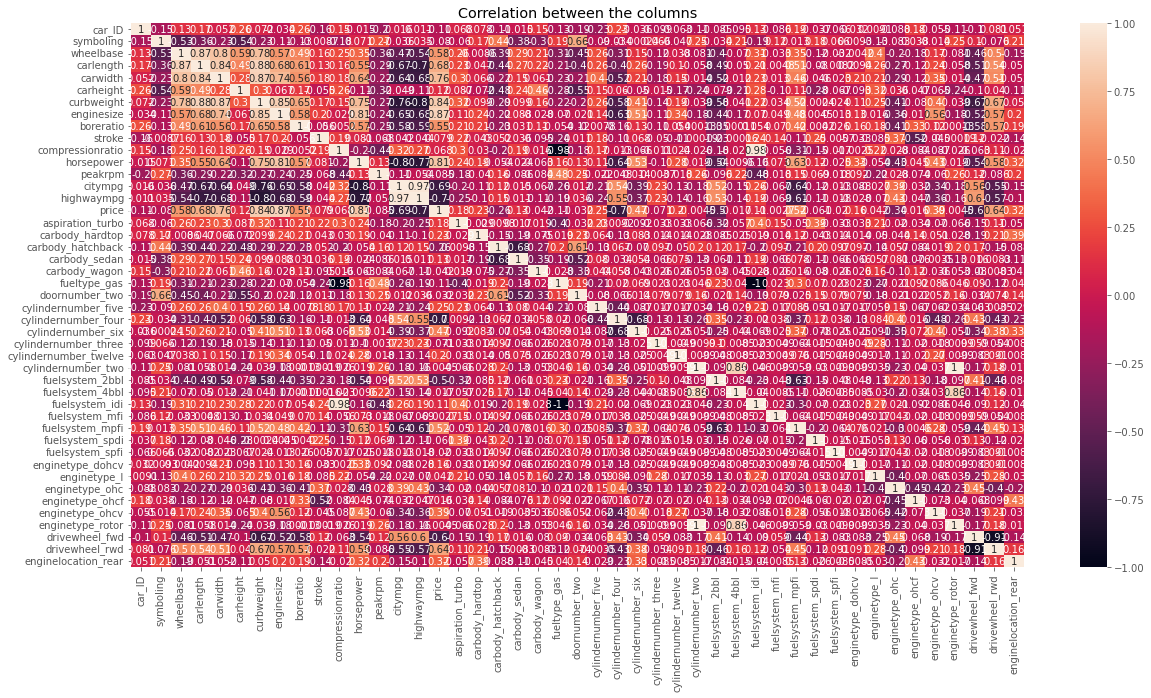

In [31]:
plt.figure(figsize=(20,10))
sns.heatmap(car_data.corr(), annot=True)
plt.title('Correlation between the columns')
plt.savefig("heatmap.png")
plt.show()


In [14]:
car_data.columns

Index(['car_ID', 'symboling', 'CarName', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'aspiration_turbo', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'fueltype_gas', 'doornumber_two',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_rear'],
      dtype='object')

In [15]:
X = car_data.drop(['CarName', 'price'], axis=1)

In [16]:
Y = car_data['price']

In [17]:
print("Shape of X is: ",X.shape)
print("Shape of y is: ", Y.shape)

Shape of X is:  (205, 44)
Shape of y is:  (205,)


In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

In [19]:
print("X_test shape:", X_test.shape)
print("X_train shape:", X_train.shape)
print("y_test shape: ", Y_test.shape)
print("y_train shape:", Y_train.shape)

X_test shape: (62, 44)
X_train shape: (143, 44)
y_test shape:  (62,)
y_train shape: (143,)


In [20]:
scaler = StandardScaler()

In [21]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
model = LinearRegression()

In [23]:
model.fit(X_train, Y_train)

LinearRegression()

In [24]:
pred = model.predict(X_test)

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [26]:
print("R2 score: ", (metrics.r2_score(pred, Y_test)))

R2 score:  0.896169139253218


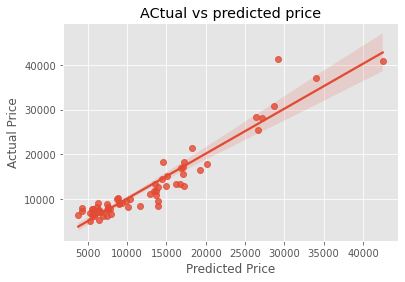

In [32]:
sns.regplot(x=pred, y=Y_test)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("ACtual vs predicted price")
plt.savefig("predictionregression.png")
plt.show()